In [1]:
# learn from https://towardsdatascience.com/machine-learning-text-processing-1d5a2d638958
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import operator
import string
import time

from wordcloud import WordCloud



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rongzhenchen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rongzhenchen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rongzhenchen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# load data
df = pd.read_csv("movie_data.csv")

In [3]:
# analyze all the text

def plot_freq_data(data, title):
    '''data in dictionary'''
    most_freq_dict = {w[0]:w[1] for w in data}
    lists = sorted(most_freq_dict.items(),key=operator.itemgetter(1)) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.figure(figsize=(8,5))
    plt.plot(x, y)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()
    
def plot_wordcloud(data):
    wordcloud = WordCloud()
    wordcloud.generate_from_frequencies(data)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
start = time.time()
reviews = df.review.str.cat(sep=' ')
#function to split sentence into words
tokens = word_tokenize(reviews)
vocabulary = set(tokens)
print("number of words: ", len(vocabulary))
end = time.time()  
print("time for counting words ", end-start)


number of words:  198896
time for counting words  330.08997797966003


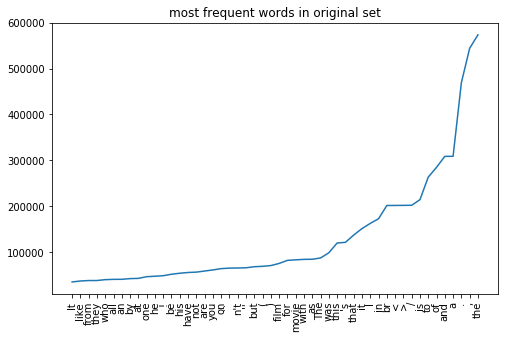

In [4]:
frequency_dist = nltk.FreqDist(tokens)
most_freq = frequency_dist.most_common(50)
plot_freq_data(most_freq, 'most frequent words in original set')

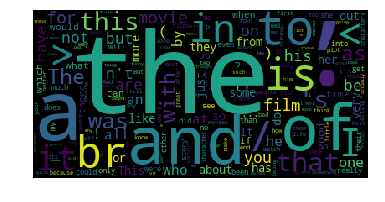

In [5]:
plot_wordcloud(frequency_dist)

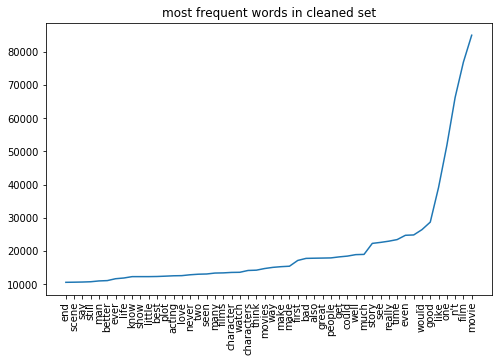

In [6]:
# remove stopwords and words with less than 2 letter
stop_words = set(stopwords.words('english'))
stop_words.add("'ll")
stop_words.add("'s")
cleaned_tokens = [w.lower() for w in tokens if not w.lower() in stop_words if len(w)>2]

frequency_dist = nltk.FreqDist(cleaned_tokens)
most_freq = frequency_dist.most_common(50)
plot_freq_data(most_freq,'most frequent words in cleaned set')

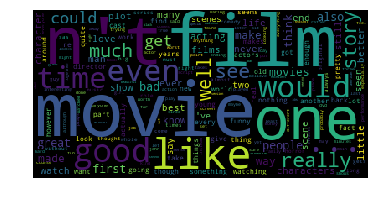

In [7]:
plot_wordcloud(frequency_dist)

In [13]:
def process_text(text):
    # seperate sentence into words
    text = word_tokenize(text)
    # find the root of the word
    lemmatizer = WordNetLemmatizer()

    text_list = [lemmatizer.lemmatize(word.lower()) for word in text
                 if word.lower() not in stop_words
                 if not word.isdigit() 
                 if len(word)>2]
    return ' '.join(text_list)

In [14]:
start = time.time()
processed_review = df['review'].apply(process_text)
end = time.time()  
print("time for clearning data ", end-start)


time for clearning data  131.05372095108032


In [15]:
df['processed_review'] = processed_review 

In [16]:
df = df.sample(frac=1).reset_index(drop=True)


In [17]:
df.head()

,review,sentiment,processed_review
0,I would like to comment on how the girls are c...,0,would like comment girl chosen always white wo...
1,Since I'm from Norway (one of the top ten (or ...,0,since norway one top ten richest country world...
2,So the other night I decided to watch Tales fr...,0,night decided watch tale hollywood hill natica...
3,"Admittedly, you can put a model airplane again...",0,admittedly put model airplane black background...
4,"Peter O'Toole, one of our finest actors, is ma...",1,peter o'toole one finest actor magnificent res...


In [19]:
X_train = df.loc[:24999, 'processed_review'].values
y_train = df.loc[:24999, 'sentiment'].values
X_test = df.loc[25000:, 'processed_review'].values
y_test = df.loc[25000:, 'sentiment'].values


In [20]:
print("number of true in train and total size")
print(np.sum(y_train==1), X_train.shape[0])
print("number of true in test")
print(np.sum(y_test==1), X_test.shape[0])

number of true in train and total size
12464 25000
number of true in test
12536 25000


In [21]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

from  sklearn.metrics  import accuracy_score
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

(25000, 70341) (25000, 70341)
0.86028


In [23]:
print("---- train directly on all the raw data")
X_train = df.loc[:24999, 'review'].values
y_train = df.loc[:24999, 'sentiment'].values
X_test = df.loc[25000:, 'review'].values
y_test = df.loc[25000:, 'sentiment'].values
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

from  sklearn.metrics  import accuracy_score
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

---- train directly on all the raw data
(25000, 76400) (25000, 76400)
0.85668
